# Shut The Box

## Visualisations

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import csv

plt.rcParams['figure.figsize'] = [20, 8]

def plot(axes, csv_file, series_name, kwargs={}):
    # given a set of axes and a csv filename, reads data from the csv file and plots it on the graph

    data = np.genfromtxt(csv_file, delimiter=',',skip_header=1, names=['x', 'y'])
    axes.plot(data['x'], data['y'], label=series_name, **kwargs)

In [51]:
# Select data to perform primary analysis on
# Edit this cell to define parameters for your model...

boards = 12 # Number of boards to use
sides = 6 # Number of sides per die
die = 2 # Number of die to roll each round

max_score = boards * (boards+1) // 2

In [52]:
model_spec = f"stb{boards}_{die}d{sides}"
data_location = f"ShutTheBox/data/{model_spec}"

vis_location = f"ShutTheBox/vis/{model_spec}"
!mkdir "ShutTheBox/vis/$model_spec"

A subdirectory or file ShutTheBox/vis/stb12_2d6 already exists.


### Probability of obtaining each score

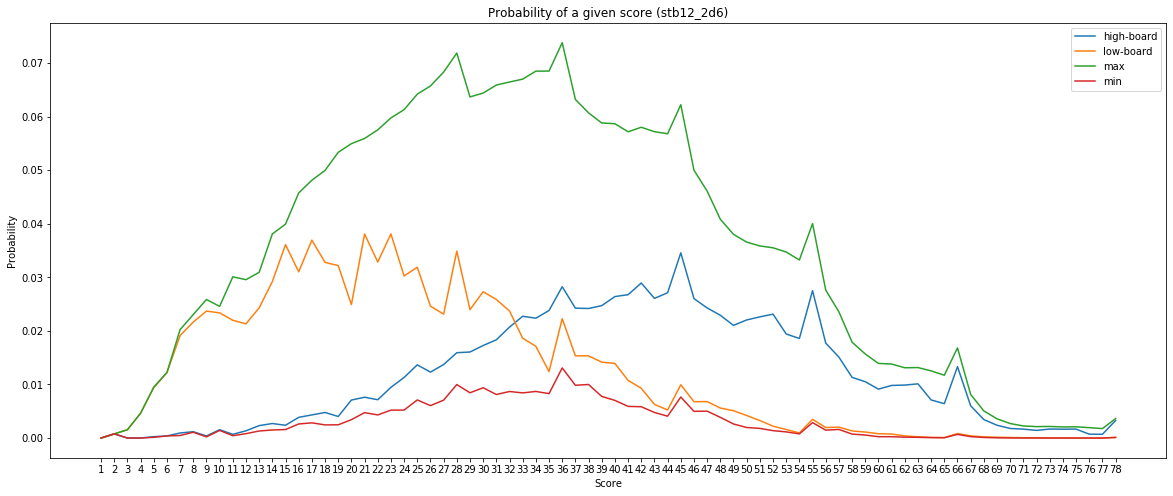

In [53]:
prob_score_high_file = f"{data_location}/{model_spec}_prob_score_high.csv"
prob_score_low_file = f"{data_location}/{model_spec}_prob_score_low.csv"
prob_score_nondet_max_file = f"{data_location}/{model_spec}_prob_score_nondet_max.csv"
prob_score_nondet_min_file = f"{data_location}/{model_spec}_prob_score_nondet_min.csv"

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title(f"Probability of a given score ({model_spec})")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, prob_score_high_file, "high-board")

plot(ax1, prob_score_low_file, "low-board")

plot(ax1, prob_score_nondet_max_file, "max")

plot(ax1, prob_score_nondet_min_file, "min")

leg = ax1.legend()

plt.savefig(f"{vis_location}/{model_spec}_prob_score.png")

plt.show()

### Cumulative probability of a given score

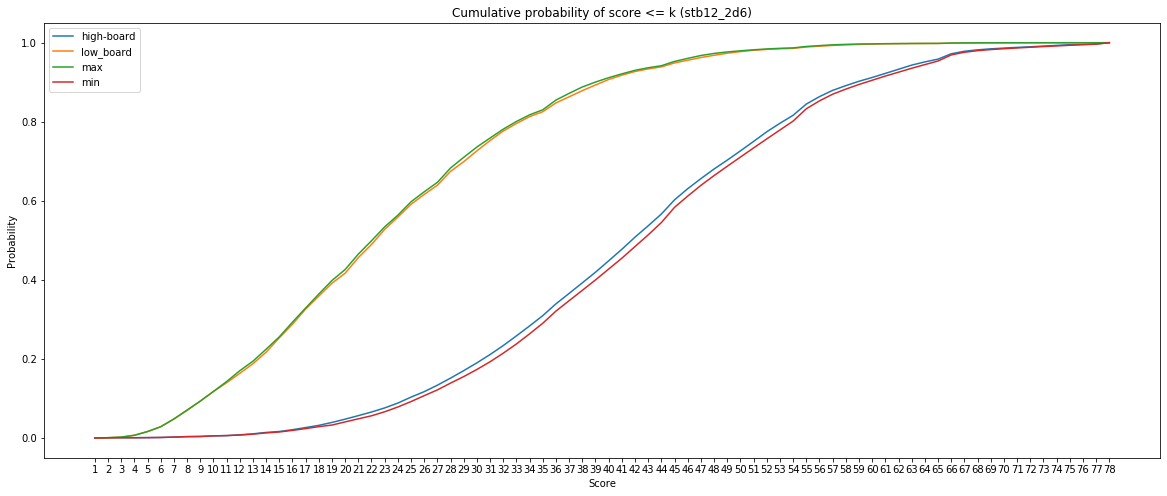

In [54]:
cum_prob_high_file = f"{data_location}/{model_spec}_cum_prob_high.csv"
cum_prob_low_file = f"{data_location}/{model_spec}_cum_prob_low.csv"
cum_prob_max_file = f"{data_location}/{model_spec}_cum_prob_max.csv"
cum_prob_min_file = f"{data_location}/{model_spec}_cum_prob_min.csv"


fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title(f"Cumulative probability of score <= k ({model_spec})")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, cum_prob_high_file, "high-board")

plot(ax1, cum_prob_low_file, "low_board")

plot(ax1, cum_prob_max_file, "max")

plot(ax1, cum_prob_min_file, "min")

leg = ax1.legend()

plt.savefig(f'{vis_location}/{model_spec}_cum_prob.png')
plt.show()

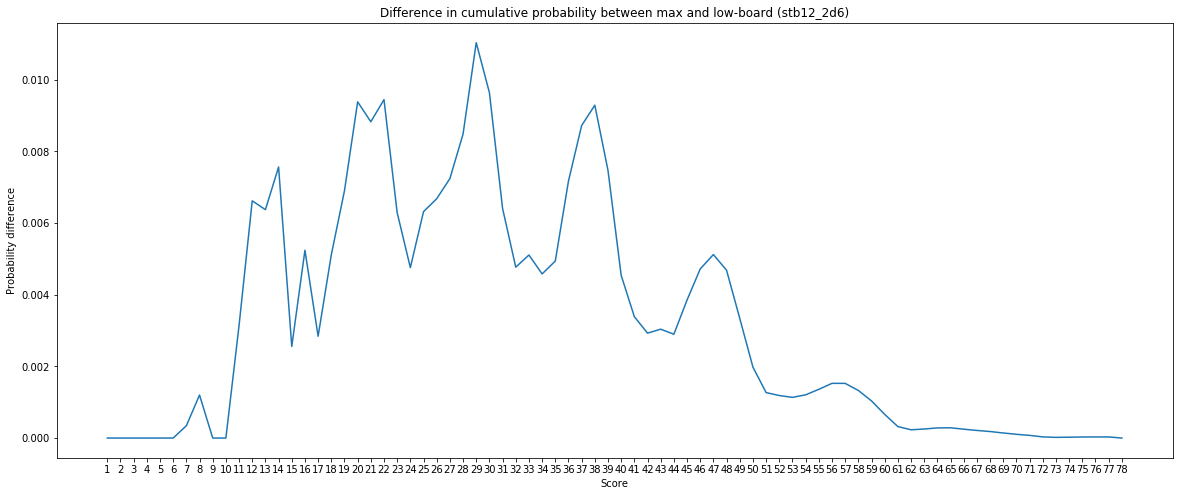

In [55]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title(f"Difference in cumulative probability between max and low-board ({model_spec})")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability difference")

ax1.set_xticks(np.arange(max_score)+1)

data_max = np.genfromtxt(cum_prob_max_file, delimiter=',',skip_header=1, names=['x', 'y'])
data_low = np.genfromtxt(cum_prob_low_file, delimiter=',',skip_header=1, names=['x', 'y'])

data_diff = data_max['y'] - data_low['y']

ax1.plot(data_max['x'], data_diff)

plt.savefig(f"{vis_location}/{model_spec}_cum_diff_max_low.png")
plt.show()

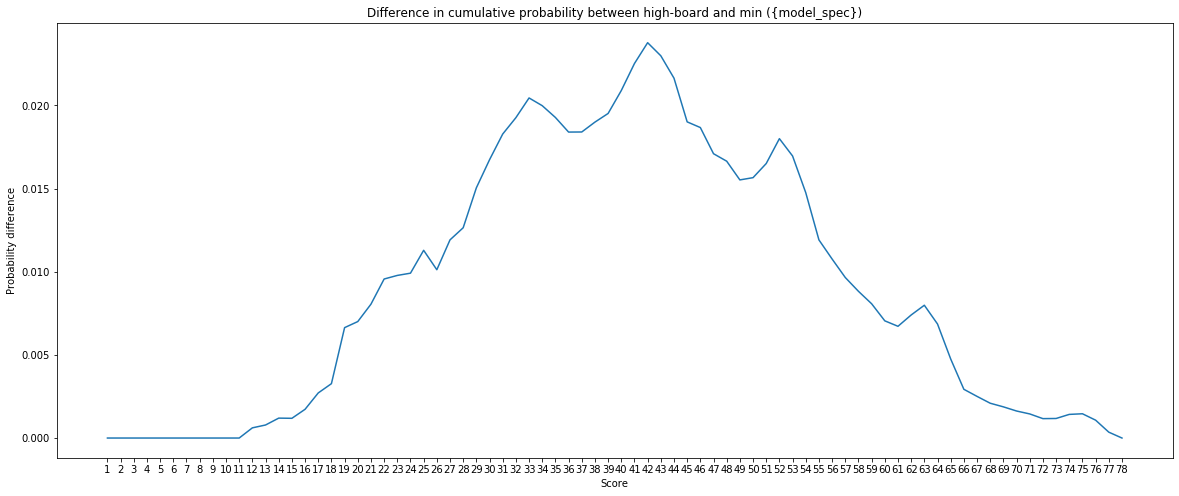

In [56]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Difference in cumulative probability between high-board and min ({model_spec})")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability difference")

ax1.set_xticks(np.arange(max_score)+1)

data_high = np.genfromtxt(cum_prob_high_file, delimiter=',',skip_header=1, names=['x', 'y'])
data_min = np.genfromtxt(cum_prob_min_file, delimiter=',',skip_header=1, names=['x', 'y'])

data_diff = data_high['y'] - data_min['y']

ax1.plot(data_min['x'], data_diff)


plt.savefig(f"{vis_location}/{model_spec}_cum_diff_high_min.png")
plt.show()

### Conditional probability of a given score for each board

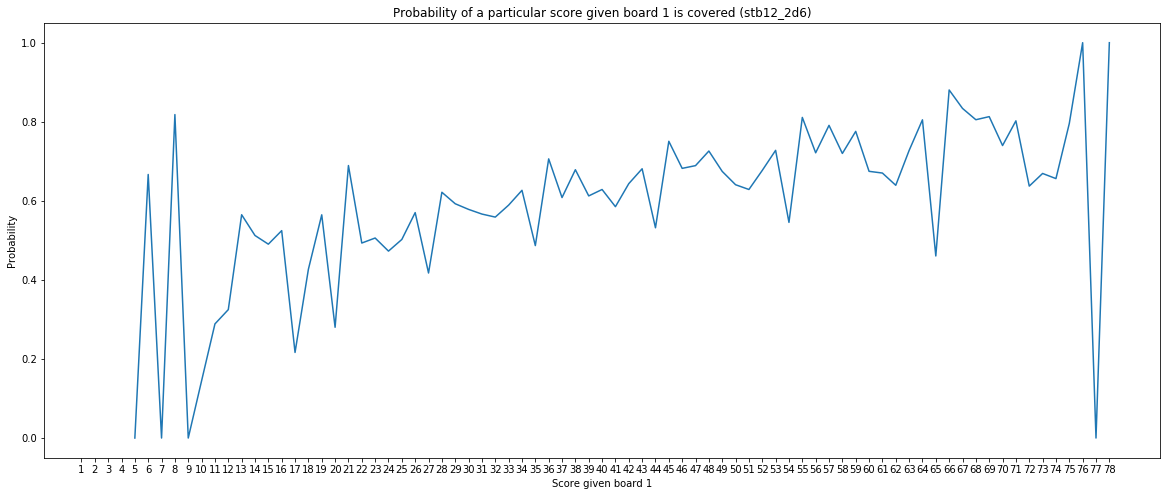

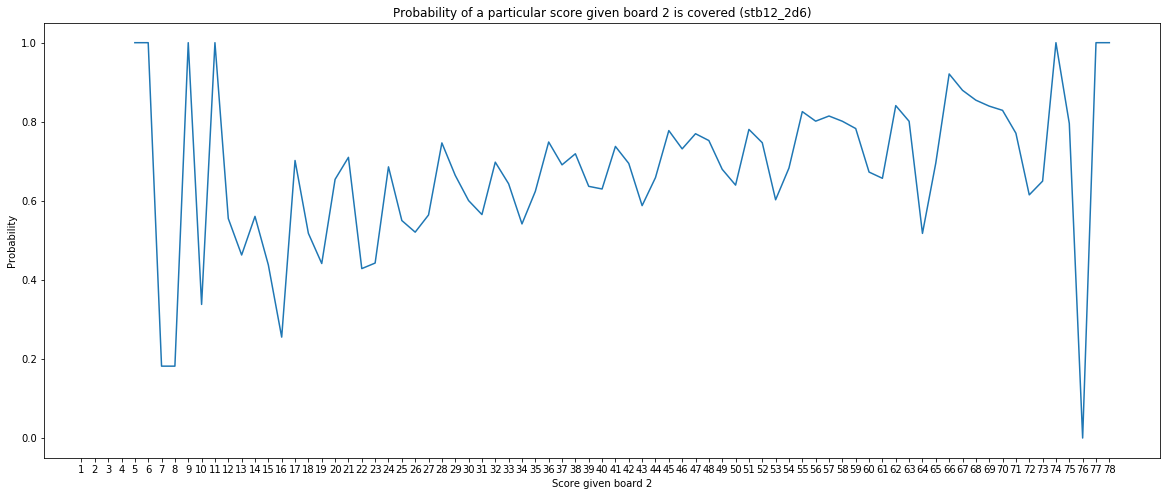

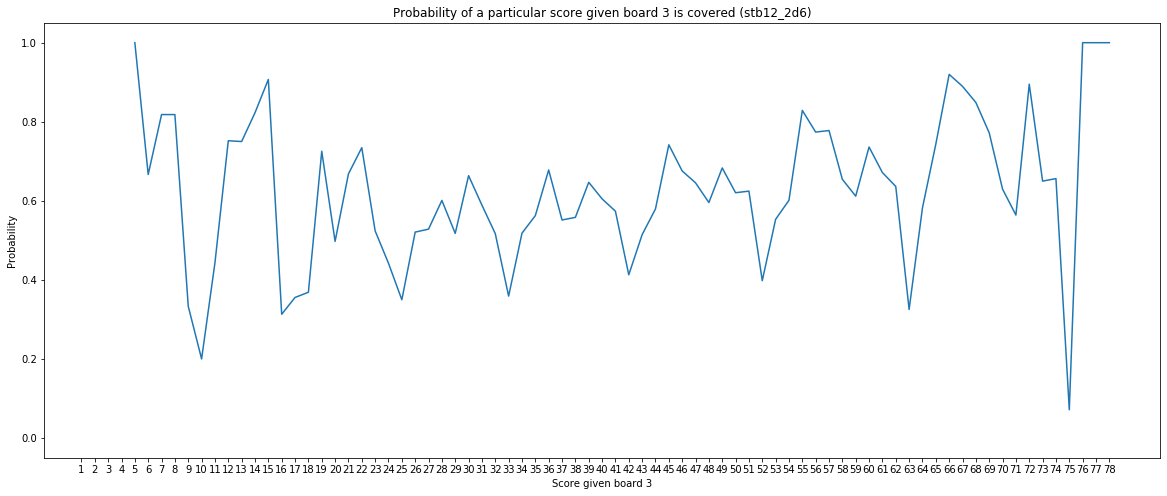

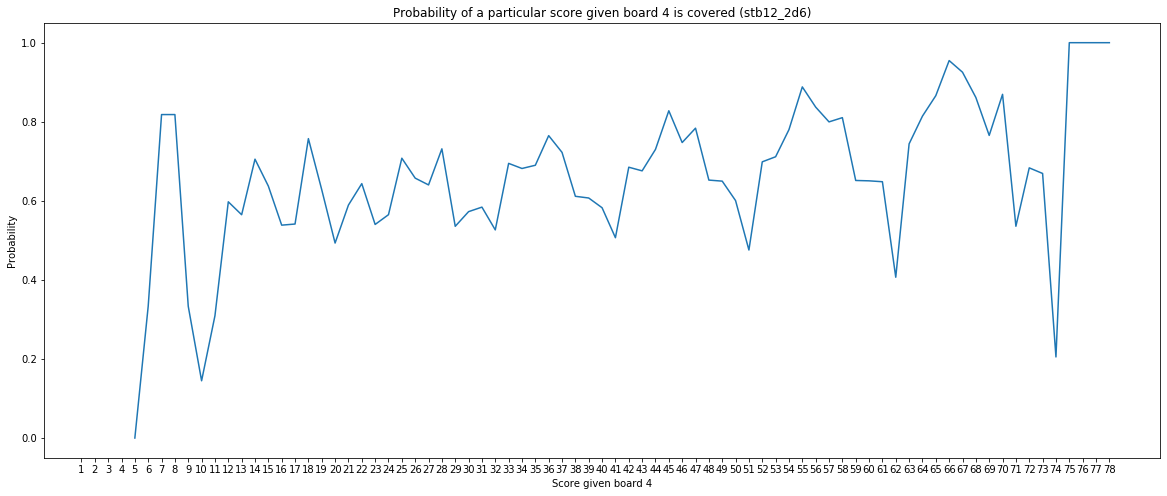

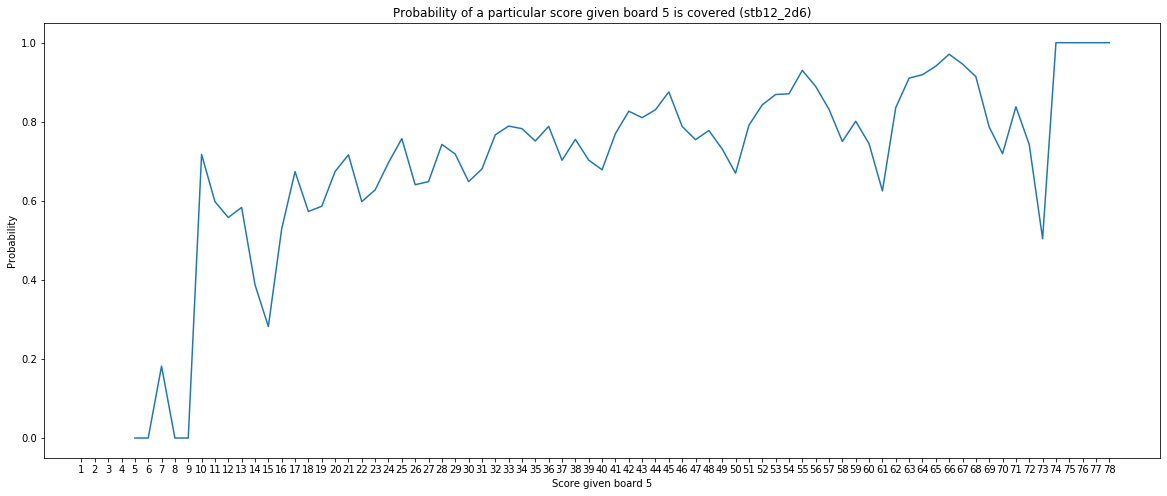

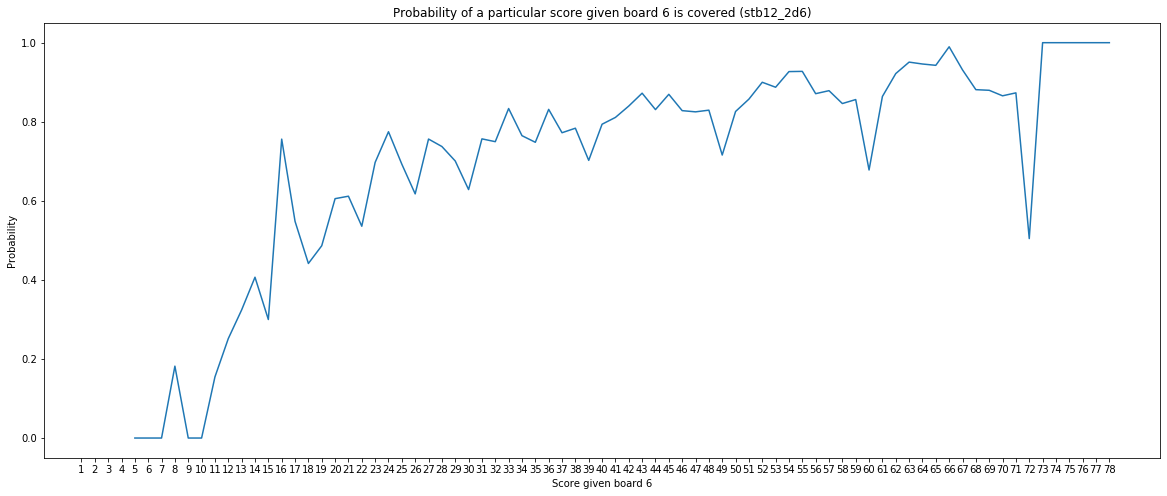

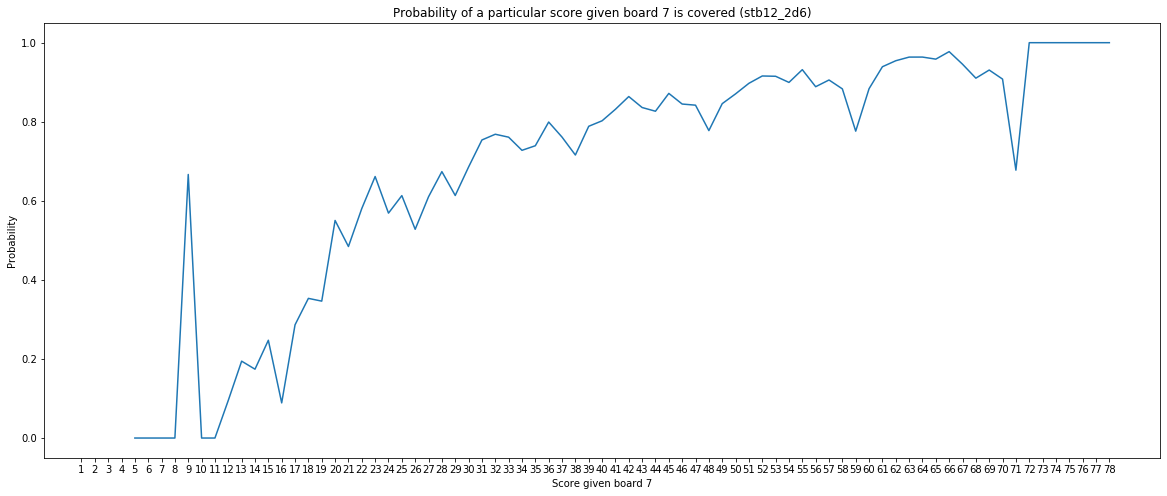

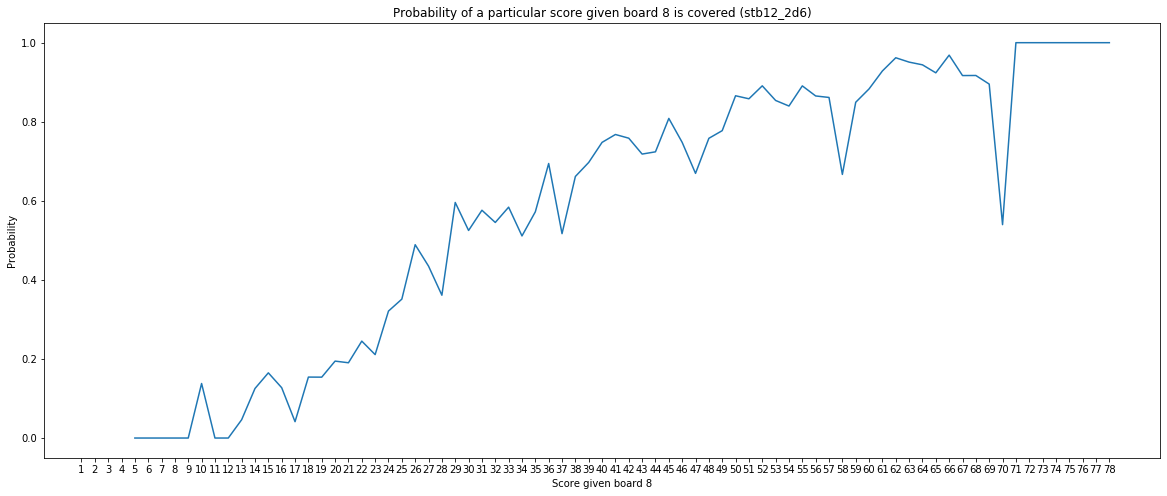

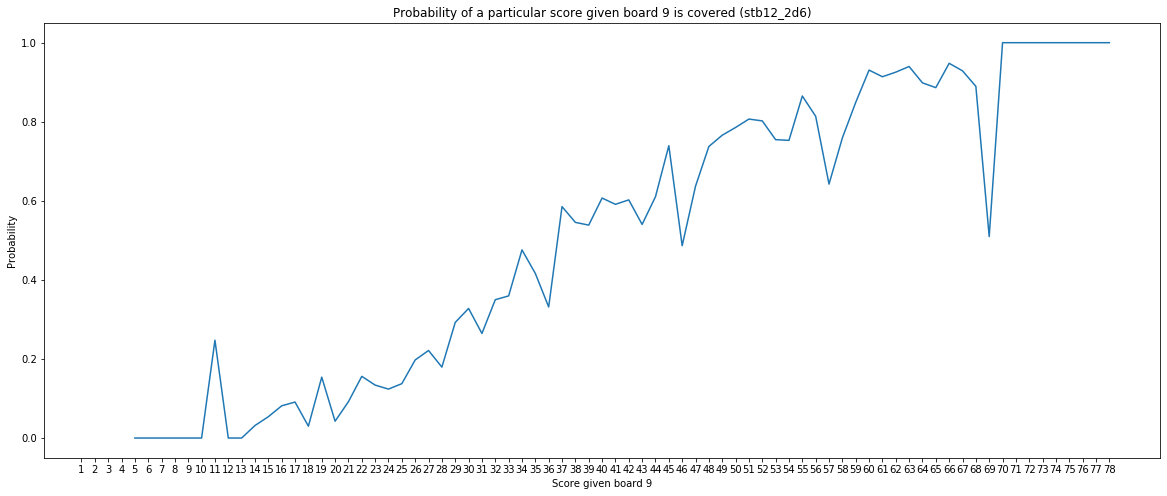

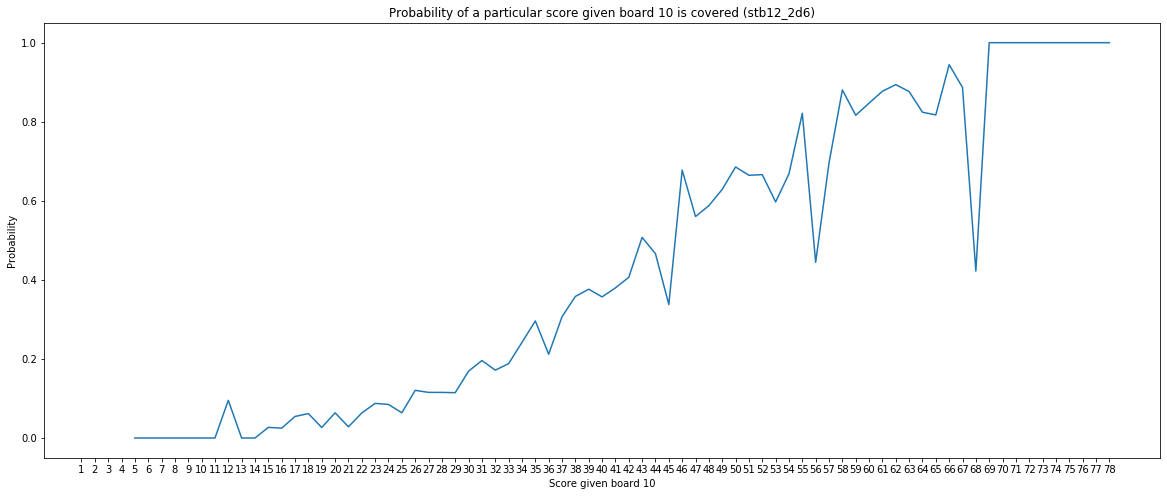

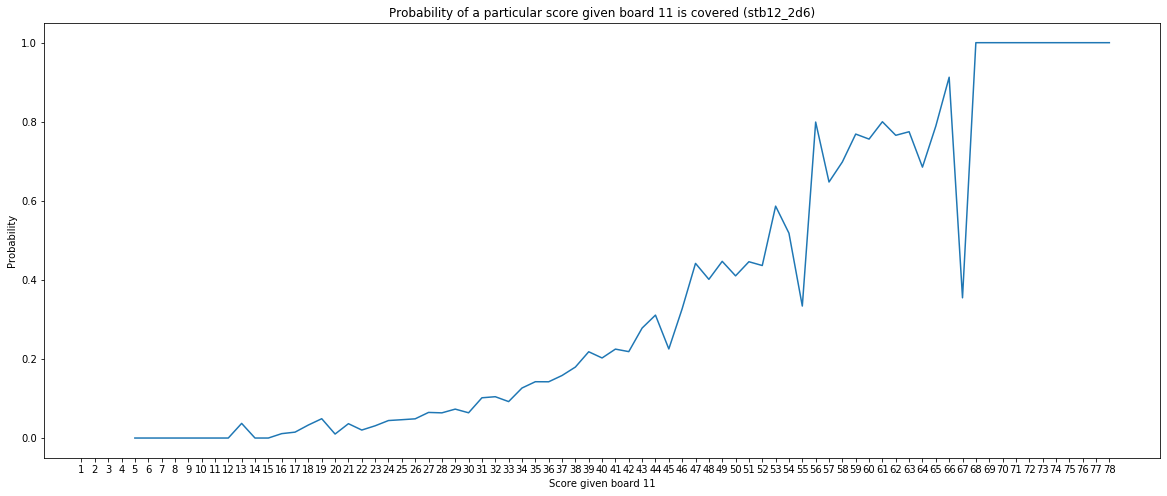

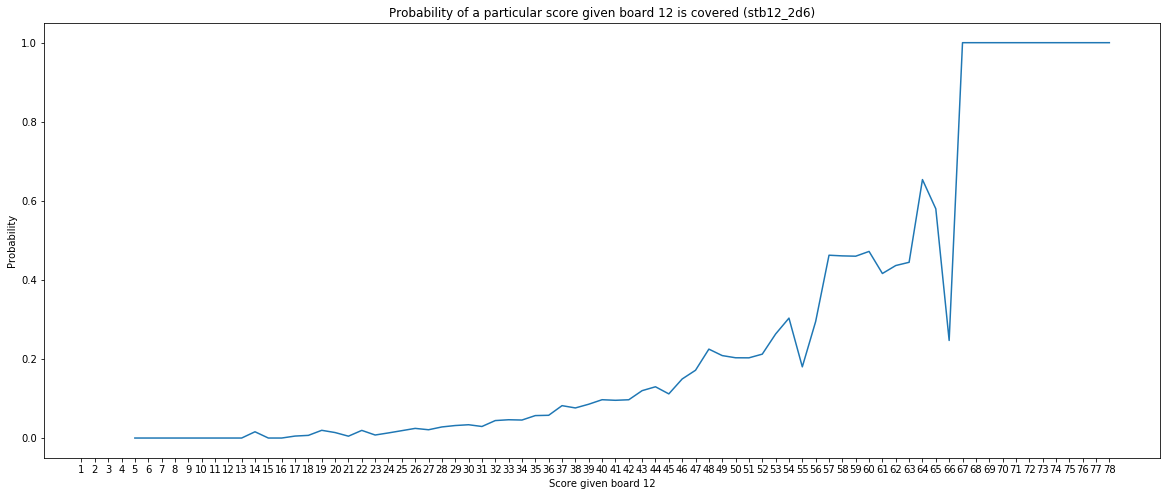

In [67]:
np.seterr(divide='print', invalid='print')


prob_high = np.genfromtxt(prob_score_high_file, delimiter=',',skip_header=1, names=['x', 'y'])

for i in range(1, boards+1):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f"Probability of a particular score given board {i} is covered ({model_spec})")
    ax.set_xlabel(f"Score given board {i}")
    ax.set_ylabel("Probability")
    ax.set_xticks(np.arange(max_score)+1)
    score_with_covered_board = np.genfromtxt(f"{data_location}/{model_spec}_score_with_covered_{i}.csv", delimiter=',',skip_header=1, names=['x', 'y'])
    cond_prob = score_with_covered_board['y'] /prob_high['y']
    
    ax.plot(score_with_covered_board['x'], cond_prob)
    
    plt.savefig(f"{vis_location}/{model_spec}_score_given_board_{i}.png")
